In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_parquet('train.parquet')

In [3]:
# Filter for "Target Drug" incidents only
df_target = df[df['Incident'] == 'TARGET DRUG']

In [4]:
# Calculate dropoff rate by month
df_target['Date'] = pd.to_datetime(df_target['Date']) # Convert date column to datetime
df_target['Month'] = df_target['Date'].dt.month # Extract month from date
dropoff_rates = df_target.groupby('Month')['Patient-Uid'].nunique().diff().fillna(0)


C:\TEMP\ipykernel_12216\1204724861.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_target['Date'] = pd.to_datetime(df_target['Date']) # Convert date column to datetime
C:\TEMP\ipykernel_12216\1204724861.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_target['Month'] = df_target['Date'].dt.month # Extract month from date


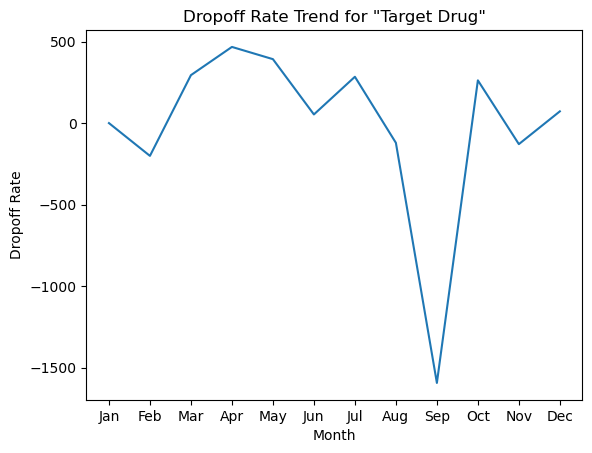

In [5]:
months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
plt.plot(months, dropoff_rates)
plt.title('Dropoff Rate Trend for "Target Drug"')
plt.xlabel('Month')
plt.ylabel('Dropoff Rate')
plt.show()


In [6]:
dropoff_reasons = df_target.groupby('Incident')['Patient-Uid'].nunique()
print(dropoff_reasons)

Incident
TARGET DRUG    9374
Name: Patient-Uid, dtype: int64


In [7]:
dropoff_reasons = df_target.groupby('Incident')['Patient-Uid'].nunique().sort_values(ascending=False)
print(dropoff_reasons)

Incident
TARGET DRUG    9374
Name: Patient-Uid, dtype: int64


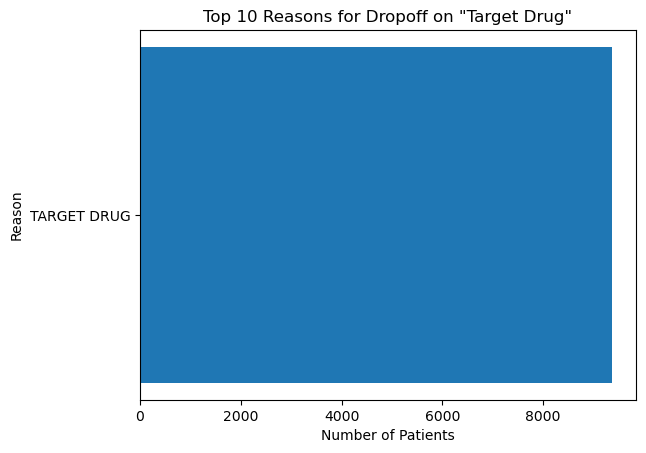

In [8]:
top_reasons = dropoff_reasons.head(10)
plt.barh(top_reasons.index, top_reasons.values)
plt.gca().invert_yaxis()
plt.title('Top 10 Reasons for Dropoff on "Target Drug"')
plt.xlabel('Number of Patients')
plt.ylabel('Reason')
plt.show()

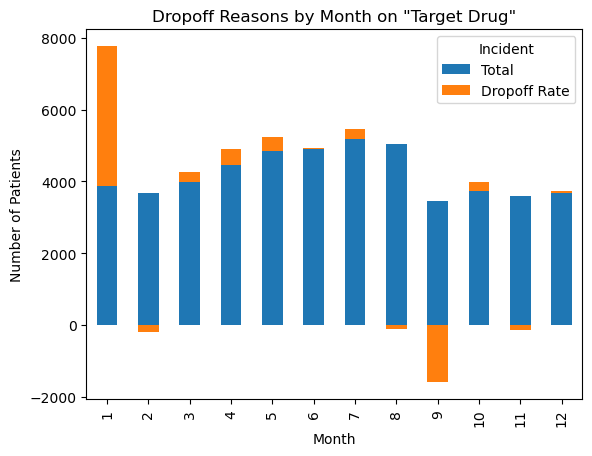

In [9]:
df_monthly_reasons = df_target.groupby(['Month', 'Incident'])['Patient-Uid'].nunique().reset_index()
df_monthly_reasons = df_monthly_reasons.pivot(index='Month', columns='Incident', values='Patient-Uid').fillna(0)
df_monthly_reasons['Total'] = df_monthly_reasons.sum(axis=1)
df_monthly_reasons['Dropoff Rate'] = df_monthly_reasons['Total'].diff().fillna(df_monthly_reasons['Total'])
df_monthly_reasons = df_monthly_reasons.drop(columns=['TARGET DRUG'])
df_monthly_reasons.plot(kind='bar', stacked=True)
plt.title('Dropoff Reasons by Month on "Target Drug"')
plt.xlabel('Month')
plt.ylabel('Number of Patients')
plt.show()